In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime

import feather


## Loading and preparing the data

In [81]:
# stop_events = pd.read_csv("../data_files/B/once/75days/stop_events_with_geo_train_test_averages.feather")

stop_events = feather.read_dataframe("../data_files/B/once/75days/stop_events_with_geo_train_test_averages.feather")

stop_events = stop_events.set_index("index")
stop_events.head()



,id,date,stopCode,aimedArrival,aimedDeparture,actualArrival,actualDeparture,vehicle,workid,patternId,...,diff_full_segment_and_median_by_segment_code,diff_full_segment_and_median_by_segment_code_and_hour_and_day,diff_percent_full_segment_and_median_by_segment_code,diff_percent_full_segment_and_median_by_segment_code_and_hour_and_day,diff_segment_and_median_by_segment_code,diff_segment_and_median_by_segment_code_and_hour_and_day,diff_percent_segment_and_median_by_segment_code,diff_percent_segment_and_median_by_segment_code_and_hour_and_day,std_diff_percent_segment_median_by_segment_code_and_hour_and_day,clock_direction_degrees
index,,,,,,,,,,,,,,,,,,,,,
0,167_101_1,2018-09-18,1200BOB20156,2018-09-18 07:03:00,2018-09-18 07:03:00,2018-09-18 07:02:25,2018-09-18 07:02:30,186,167_101_1,167_79,...,-25.0,-9.0,-53.191489,-29.032258,0.0,2.0,0.000000,13.333333,84.273715,166.467125
1,167_101_1,2018-09-18,1200BOB20155,2018-09-18 07:04:00,2018-09-18 07:04:00,2018-09-18 07:02:48,2018-09-18 07:02:53,186,167_101_1,167_79,...,0.0,2.0,0.000000,9.523810,0.0,1.0,0.000000,5.882353,28.575033,166.907431
2,167_101_1,2018-09-18,1200BOB20153,2018-09-18 07:05:00,2018-09-18 07:05:00,2018-09-18 07:03:11,2018-09-18 07:03:16,186,167_101_1,167_79,...,-21.0,-0.5,-47.727273,-2.127660,-2.0,0.0,-10.000000,0.000000,35.313329,167.432808
3,167_101_1,2018-09-18,1200BOB20151,2018-09-18 07:07:00,2018-09-18 07:07:00,2018-09-18 07:03:58,2018-09-18 07:04:51,186,167_101_1,167_79,...,-36.0,-42.0,-43.373494,-47.191011,-5.0,0.0,-10.638298,0.000000,82.278146,167.953018
4,167_101_1,2018-09-18,1200BOB20148,2018-09-18 07:08:00,2018-09-18 07:08:00,2018-09-18 07:05:34,2018-09-18 07:05:39,186,167_101_1,167_79,...,-7.0,-4.0,-6.796117,-4.000000,-16.0,-3.0,-27.118644,-6.521739,54.797820,168.050564


In [82]:
stop_events.head(30)

print(stop_events.shape)

stop_events = stop_events.dropna(subset=['arrival_hour', 'to_centre_dist','segment_duration'], axis=0)

# # stop_events = stop_events[stop_events.id != "NaN"]

print(stop_events.shape)

(3920378, 68)
(3920378, 68)


In [83]:
stop_events = stop_events[(stop_events['arrival_hour'] > 4) | (stop_events['arrival_hour'] == 0)]

In [84]:
stop_events['speed'] = stop_events['line_distance'] / stop_events['segment_duration'] * 60 * 60
stop_events['speed'] = stop_events['speed'].replace(np.inf, np.nan)

In [85]:
by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['to_centre_dist'], np.linspace(0,10,11))])['speed'].mean()


In [86]:
by_hour_and_distance = by_hour_and_distance.reset_index()
by_hour_and_distance.columns = ['hour', 'distance', 'mean speed']
by_hour_and_distance=by_hour_and_distance.pivot('hour', 'distance')

In [87]:
by_hour_and_distance.head(20)

mean speed                                                         \
distance (0.0, 1.0] (1.0, 2.0] (2.0, 3.0] (3.0, 4.0] (4.0, 5.0] (5.0, 6.0]   
hour                                                                         
0         27.940097  36.320777  33.624379  37.386569  35.698226  38.797881   
5         25.598208  33.728808  38.968503  38.692370  34.456948  36.154901   
6         27.541309  34.570557  31.610561  34.901684  33.008357  35.147474   
7         26.232293  33.984595  28.314503  31.148091  30.889981  33.550889   
8         25.761932  32.349248  25.277736  27.018665  29.195962  32.650238   
9         25.485448  33.408656  26.826126  30.039197  30.992635  33.313569   
10        24.619376  32.866548  26.973967  29.932698  30.424262  33.495828   
11        24.391628  32.535864  26.228678  29.490404  30.113293  32.988130   
12        24.064616  31.950076  26.005767  29.431200  29.993280  33.462500   
13        24.069804  31.773420  25.677423  29.590848  30.426270  33.467853   
14        23.443370  31.871209  25.835711  28.927872  29.906027  33.409410   
15        23.262001  31.734043  24.814972  26.876223  28.877343  32.620642   
16        22.846371  30.820858  24.594344  27.457131  29.617262  33.056968   
17        22.116103  29.820215  24.360938  28.016160  29.457488  33.008987   
18        23.316598  31.103876  26.416417  29.762105  30.329469  33.708496   
19        23.703030  32.635712  28.038185  31.541372  31.396286  34.241502   
20        26.604711  34.432296  30.444402  34.512703  32.618066  36.527751   
21        27.083608  34.579844  31.356076  35.408335  34.083473  36.900941   
22        27.390396  34.489636  31.521434  35.658691  34.302166  37.090187   
23        27.758229  35.778619  32.969402  36.427191  34.819213  38.126314   

                                                       
distance (6.0, 7.0] (7.0, 8.0] (8.0, 9.0] (9.0, 10.0]  
hour                                                   
0         38.629848  30.946544  31.726071   48.854071  
5         39.232759  29.503715  35.391743   48.190073  
6         38.536350  26.621738  30.287247   36.581054  
7         34.303793  25.135598  27.148016   36.455203  
8         30.626645  21.705274  25.118042   38.600296  
9         33.315101  22.219756  25.560869   40.341633  
10        33.845781  21.754868  24.497661   37.286416  
11        33.303266  20.681170  23.832604   37.483278  
12        33.444940  20.764990  24.009779   36.270115  
13        33.666675  21.586878  24.734853   37.657747  
14        33.551633  21.294686  24.958261   38.214831  
15        31.186738  20.245385  24.270181   38.085204  
16        31.290832  20.306178  23.218866   34.926082  
17        31.498369  20.388231  22.739372   35.107404  
18        33.235687  22.755344  24.966544   38.657147  
19        34.880881  23.554440  26.978662   46.125075  
20        36.503028  25.536015  28.801878   46.576755  
21        37.070367  26.385364  28.535309   48.014420  
22        38.409620  27.042856  29.188005   46.158270  
23        38.812262  29.034117  30.271457   49.910332

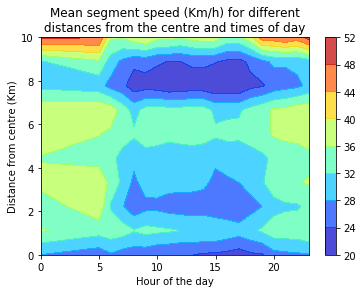

In [88]:
X=np.linspace(0,10,10)
Y=by_hour_and_distance.index.values.astype(float)
Z=by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Distance from centre (Km)")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean segment speed (Km/h) for different\ndistances from the centre and times of day");
plt.savefig("speed against dist and hour.png", dpi=400)

In [89]:
stop_events['diff_in_jd_from_median_by_segement'] = stop_events['segment_duration'] - stop_events['median_durations_by_segment_code']


In [90]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['to_centre_dist'], np.linspace(0,10,11))])['diff_in_jd_from_median_by_segement'].mean()


In [91]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'distance', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'distance')

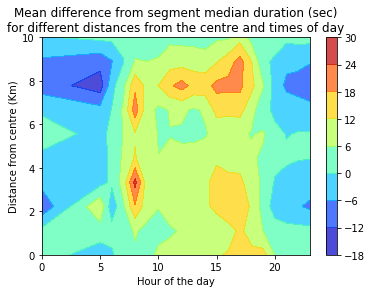

In [92]:
X=np.linspace(0,10,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=mean_diff_from_median_by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Distance from centre (Km)")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec)\nfor different distances from the centre and times of day");
plt.savefig("Mean diff from median against dist and hour.png", dpi=400)

In [93]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['direction_degrees'], np.linspace(-90,90,11))])['diff_in_jd_from_median_by_segement'].mean()


In [94]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'direction', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'direction')

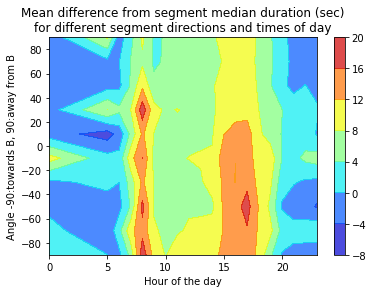

In [95]:
X=np.linspace(-90,90,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=mean_diff_from_median_by_hour_and_distance.values
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Angle -90:towards B, 90:away from B")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec)\nfor different segment directions and times of day");
plt.savefig("Mean diff from median against segment angle and hour.png", dpi=400)

In [103]:
mean_diff_from_median_by_hour_and_distance = stop_events.groupby(['arrival_hour', pd.cut(stop_events['clock_direction_degrees'], np.linspace(0,180,11))])['diff_in_jd_from_median_by_segement'].mean()


In [104]:
mean_diff_from_median_by_hour_and_distance = mean_diff_from_median_by_hour_and_distance.reset_index()
mean_diff_from_median_by_hour_and_distance.columns = ['hour', 'direction', 'diff from median']
mean_diff_from_median_by_hour_and_distance=mean_diff_from_median_by_hour_and_distance.pivot('hour', 'direction')

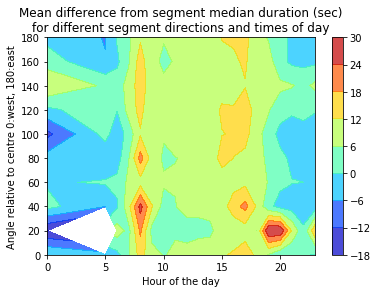

In [108]:
X=np.linspace(0,180,10)
Y=mean_diff_from_median_by_hour_and_distance.index.values.astype(float)
Z=np.clip(mean_diff_from_median_by_hour_and_distance.values, -30, 30)
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Angle relative to centre 0:west, 180:east")
plt.xlabel("Hour of the day")
plt.colorbar()
plt.title("Mean difference from segment median duration (sec)\nfor different segment directions and times of day");
plt.savefig("Mean diff from median against segment angle to B and hour.png", dpi=400)


In [101]:
stop_events['clock_direction_degrees'].max()

179.80407279133112

In [96]:
stop_events.columns

Index(['id', 'date', 'stopCode', 'aimedArrival', 'aimedDeparture',
       'actualArrival', 'actualDeparture', 'vehicle', 'workid', 'patternId',
       'publicName', 'scheduledStart', 'prev_stopCode', 'prev_aimedArrival',
       'prev_aimedDeparture', 'prev_actualArrival', 'prev_actualDeparture',
       'timingPoint', 'prev_timingPoint', 'segment_code', 'segment_name',
       'line_distance', 'midpoint_lat', 'midpoint_lon', 'to_centre_dist',
       'direction', 'direction_degrees', 'train', 'test', 'rain',
       'dwell_duration_dest', 'dwell_duration_prev', 'segment_duration',
       'timetable_segment_duration', 'full_duration', 'arrival_hour',
       'arrival_day', 'mean_durations_by_segment_code',
       'mean_durations_by_segment_code_and_hour',
       'mean_durations_by_segment_code_and_hour_and_day',
       'mean_dwell_dest_durations_by_stop_code',
       'mean_dwell_prev_durations_by_stop_code',
       'mean_dwell_dest_by_stop_code_and_hour',
       'mean_dwell_prev_by_stop_code